In [ ]:
#pip install -U scvelo

In [76]:
import scvelo as scv
import pandas as pd
from anndata import AnnData
import scanpy as sc
import os


scv.set_figure_params()

In [ ]:
import loompy
files = ["loom/data/feeleyb-23M_ACL_cellranger_velocyto.loom","loom/data/firstfive_cellranger_velocyto.loom","loom/data/feeleyb-ACL22f_cellranger_velocyto.loom","loom/data/feeleyb-ACL26f_cellranger_velocyto.loom","loom/data/feeleyb-ACL29f_cellranger_velocyto.loom","loom/data/feeleyb-ACL30f_cellranger_velocyto.loom","loom/data/feeleyb-ACL26m_cellranger_velocyto.loom"]
loompy.combine(files,output_file="ACL_combined.loom")



In [97]:

adata = scv.read("fibro.h5ad", cache = False)
ldata = scv.read("ACL_combined.loom", cache = False)

In [93]:
adata.obs_names

Index(['firstfive_cellranger_velocyto:AAACGAACAAGGCAACx',
       'firstfive_cellranger_velocyto:AAACGCTGTAGCTTACx',
       'firstfive_cellranger_velocyto:AAACGCTTCCTACCACx',
       'firstfive_cellranger_velocyto:AAACGCTTCTCATGCCx',
       'firstfive_cellranger_velocyto:AAAGGTACACAATCTGx',
       'firstfive_cellranger_velocyto:AAAGGTAGTGGATTTCx',
       'firstfive_cellranger_velocyto:AAAGTGAGTCAAACGGx',
       'firstfive_cellranger_velocyto:AAAGTGAGTGGCTCTGx',
       'firstfive_cellranger_velocyto:AAAGTGAGTTATTCTCx',
       'firstfive_cellranger_velocyto:AAATGGATCGTGGACCx',
       ...
       'aclfeeleyb-23M_ACL_cellranger_velocyto:TTTCCTCAGCATCAGGx',
       'aclfeeleyb-23M_ACL_cellranger_velocyto:TTTCGATCAAACGGCAx',
       'aclfeeleyb-23M_ACL_cellranger_velocyto:TTTCGATCACCAAATCx',
       'aclfeeleyb-23M_ACL_cellranger_velocyto:TTTGACTAGGTGATATx',
       'aclfeeleyb-23M_ACL_cellranger_velocyto:TTTGACTCAATTGTGCx',
       'aclfeeleyb-23M_ACL_cellranger_velocyto:TTTGACTGTGACACGAx',
       

In [94]:
ldata.obs_names

Index(['feeleyb-23M_ACL_cellranger_velocyto:AAAGGATTCTAACGGTx',
       'feeleyb-23M_ACL_cellranger_velocyto:AACAAAGAGACAACTAx',
       'feeleyb-23M_ACL_cellranger_velocyto:AAAGTCCCAAACCGGAx',
       'feeleyb-23M_ACL_cellranger_velocyto:AAACGAAGTATATGGAx',
       'feeleyb-23M_ACL_cellranger_velocyto:AAACGCTTCGACGCTGx',
       'feeleyb-23M_ACL_cellranger_velocyto:AAACGAATCGGTCAGCx',
       'feeleyb-23M_ACL_cellranger_velocyto:AAACCCATCACCCTGTx',
       'feeleyb-23M_ACL_cellranger_velocyto:AAAGTGAGTCGTGATTx',
       'feeleyb-23M_ACL_cellranger_velocyto:AAAGTGACAAGAGAGAx',
       'feeleyb-23M_ACL_cellranger_velocyto:AACAACCGTACCCGCAx',
       ...
       'feeleyb-ACL26m_cellranger_velocyto:TGCAGTAGTACGTACTx',
       'feeleyb-ACL26m_cellranger_velocyto:TAACGACAGAAGCGGGx',
       'feeleyb-ACL26m_cellranger_velocyto:TCAAGCAAGAACCGCAx',
       'feeleyb-ACL26m_cellranger_velocyto:GCATCTCCAGGATCTTx',
       'feeleyb-ACL26m_cellranger_velocyto:GTTACCCCACCAGGTCx',
       'feeleyb-ACL26m_cellranger_

In [98]:
adata = scv.utils.merge(adata, ldata)
#adata=adata[seur_names["x"]]

In [99]:
scv.pp.filter_and_normalize(adata,min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

## dynamic modeling
##scv.tl.recover_dynamics(adata,var_names='all')
scv.tl.recover_dynamics(adata)
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

Filtered out 746 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Logarithmized X.
computing neighbors


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/10 cores)
    finished (0:02:39) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/10 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Library/F

saving figure to file ./figures/scvelo_Fibro_velo.pdf


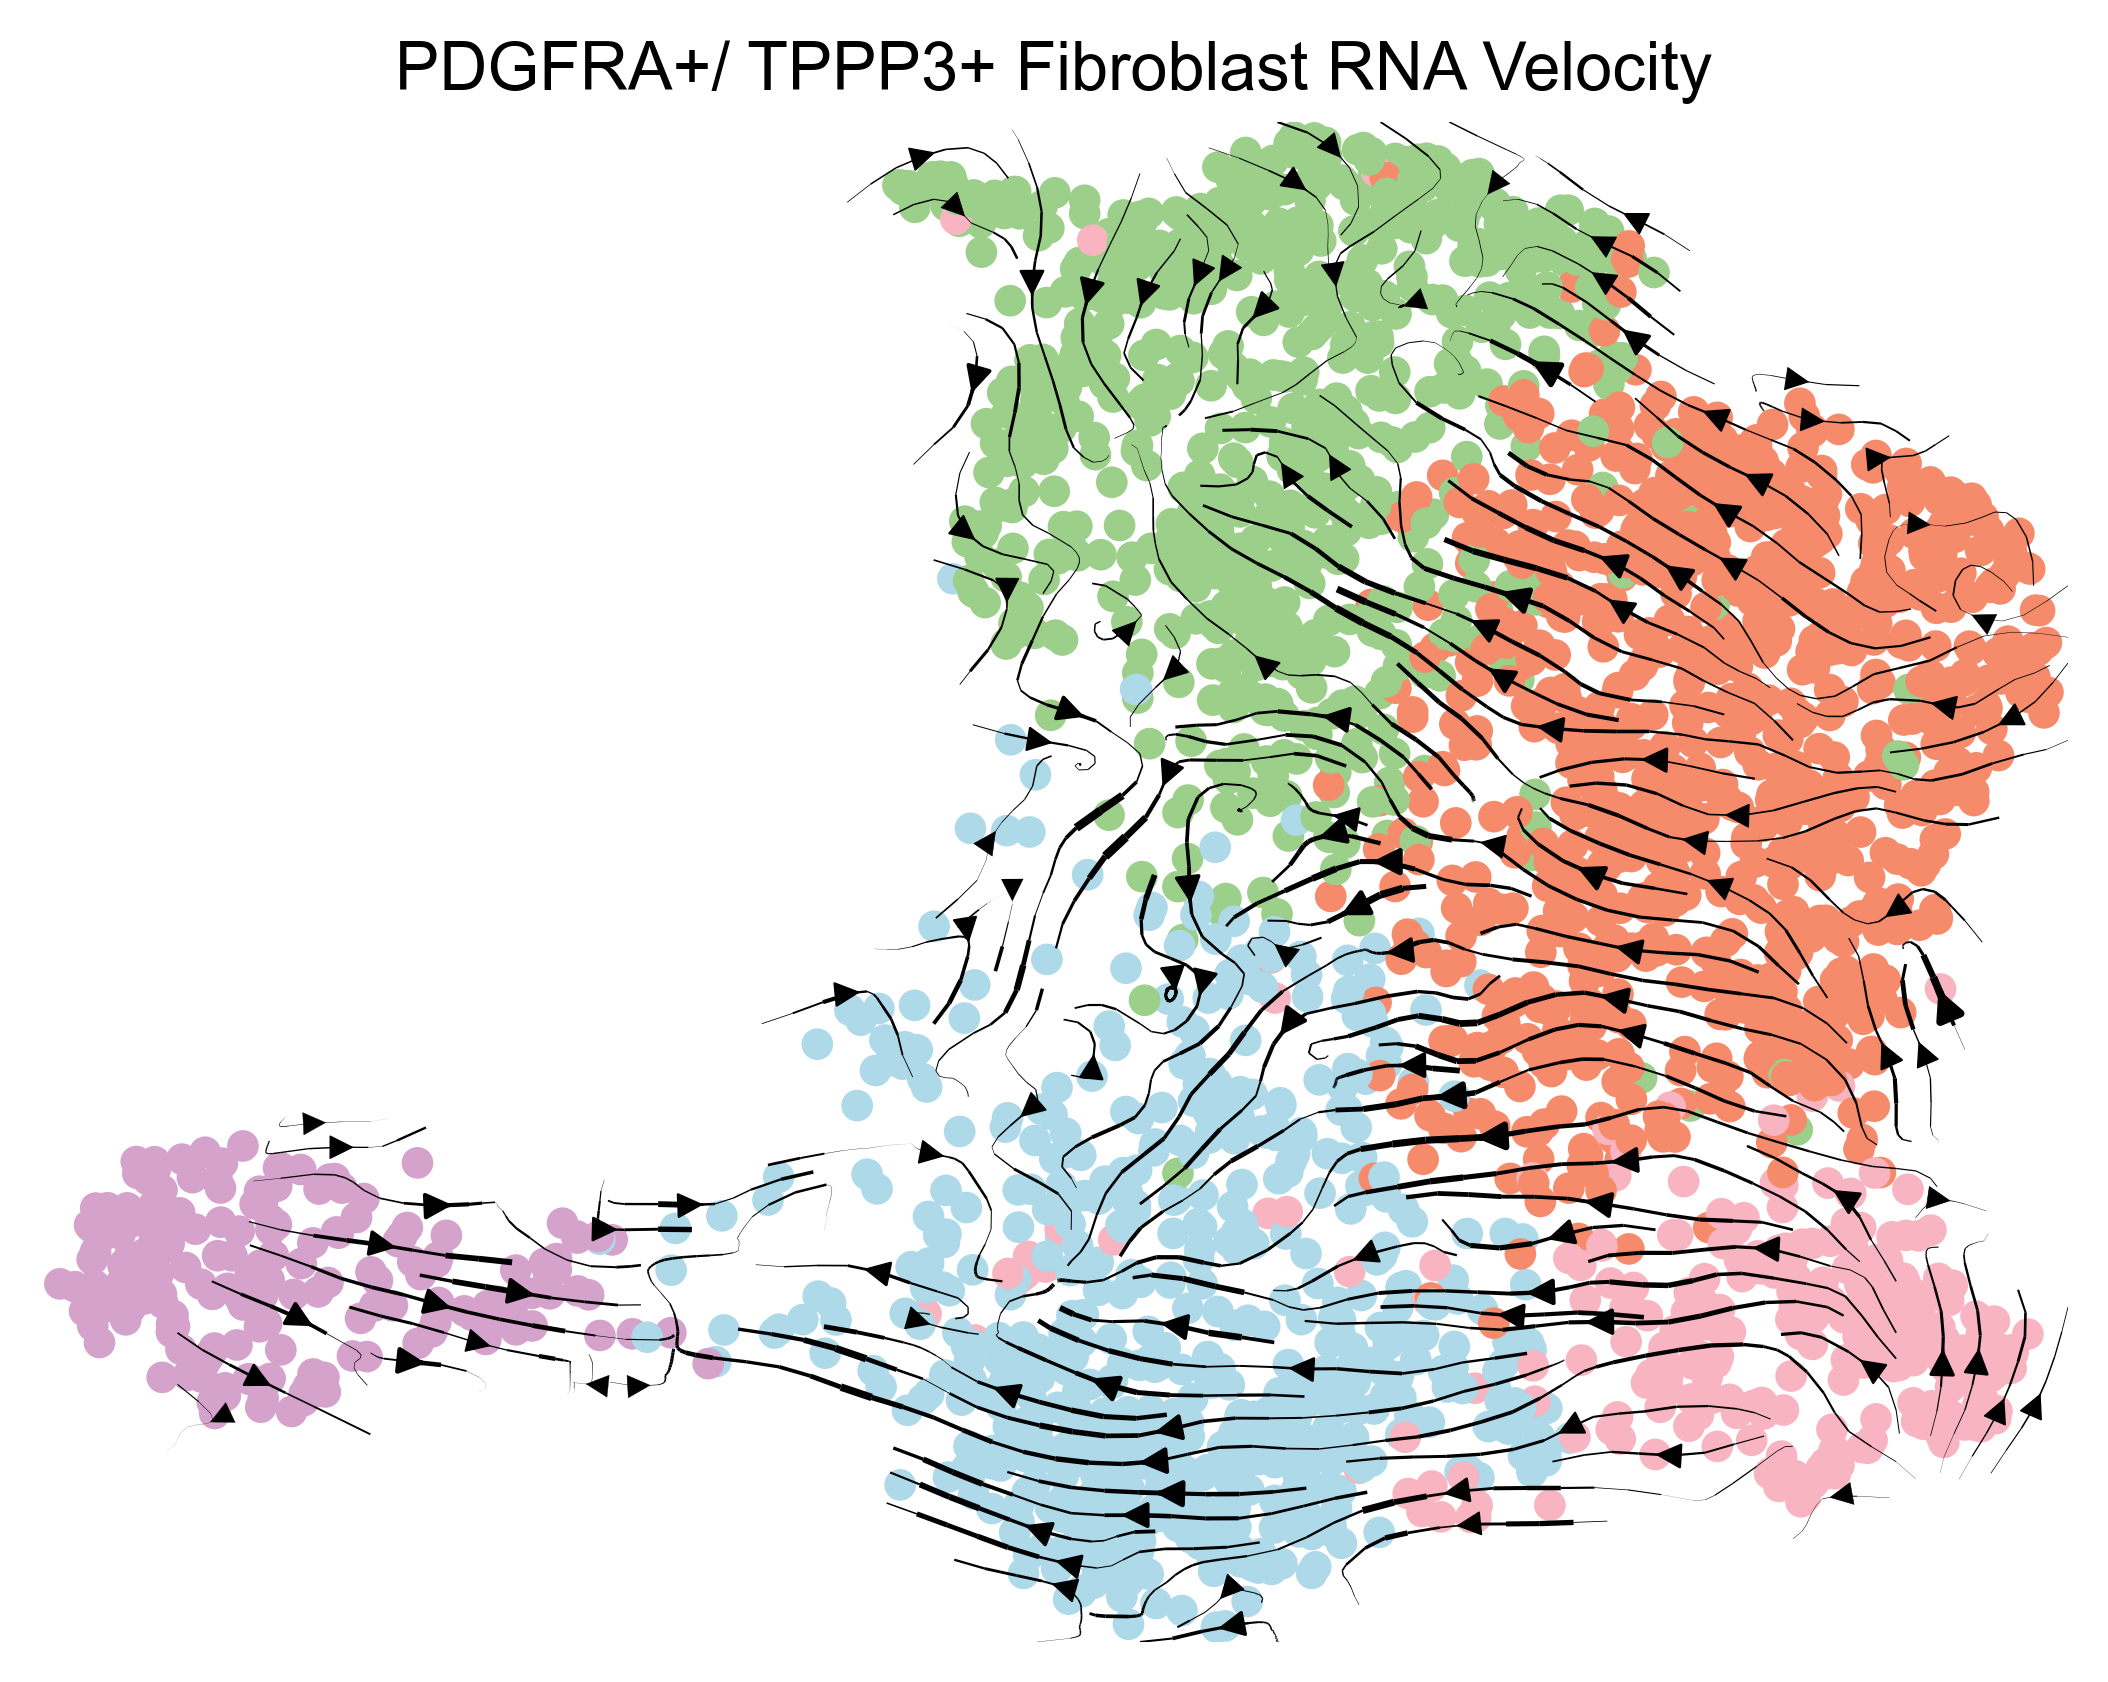

In [120]:
scv.set_figure_params(format='pdf')
scv.pl.velocity_embedding_stream(adata, basis = 'umap', 
                                 color = "fib_cells", 
                                 density = 2,
                                 size = 130,
                                 alpha = 1,
                                 palette= ["#f58b6b","#add9e8","#9ccf8a","#f8b5c1","#d4a2ca"],
                                 title = 'PDGFRA+/ TPPP3+ Fibroblast RNA Velocity',
                                 legend_loc = 'none',
                                 dpi = 200,
                                 figsize = (6.5,5),
                                 save='Fibro_velo.pdf')

In [110]:

mdata = scv.read("fibro_male.h5ad")
ldata = scv.read("ACL_combined.loom")
mdata = scv.utils.merge(mdata, ldata)

In [111]:
scv.pp.filter_and_normalize(mdata,min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(mdata, n_pcs=30, n_neighbors=30)

## dynamic modeling
##scv.tl.recover_dynamics(mdata,var_names='all')
scv.tl.recover_dynamics(mdata, n_jobs= 20)
scv.tl.velocity(mdata, mode='dynamical')
scv.tl.velocity_graph(mdata)

scv.set_figure_params(format='pdf')

Filtered out 1065 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 10/10 cores)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


    finished (0:00:07) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/10 cores)
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Library/F

figure cannot be saved as pdf, using png instead (can only output finite numbers in pdf).
saving figure to file ./figures/scvelo_male_fibro_velo.png


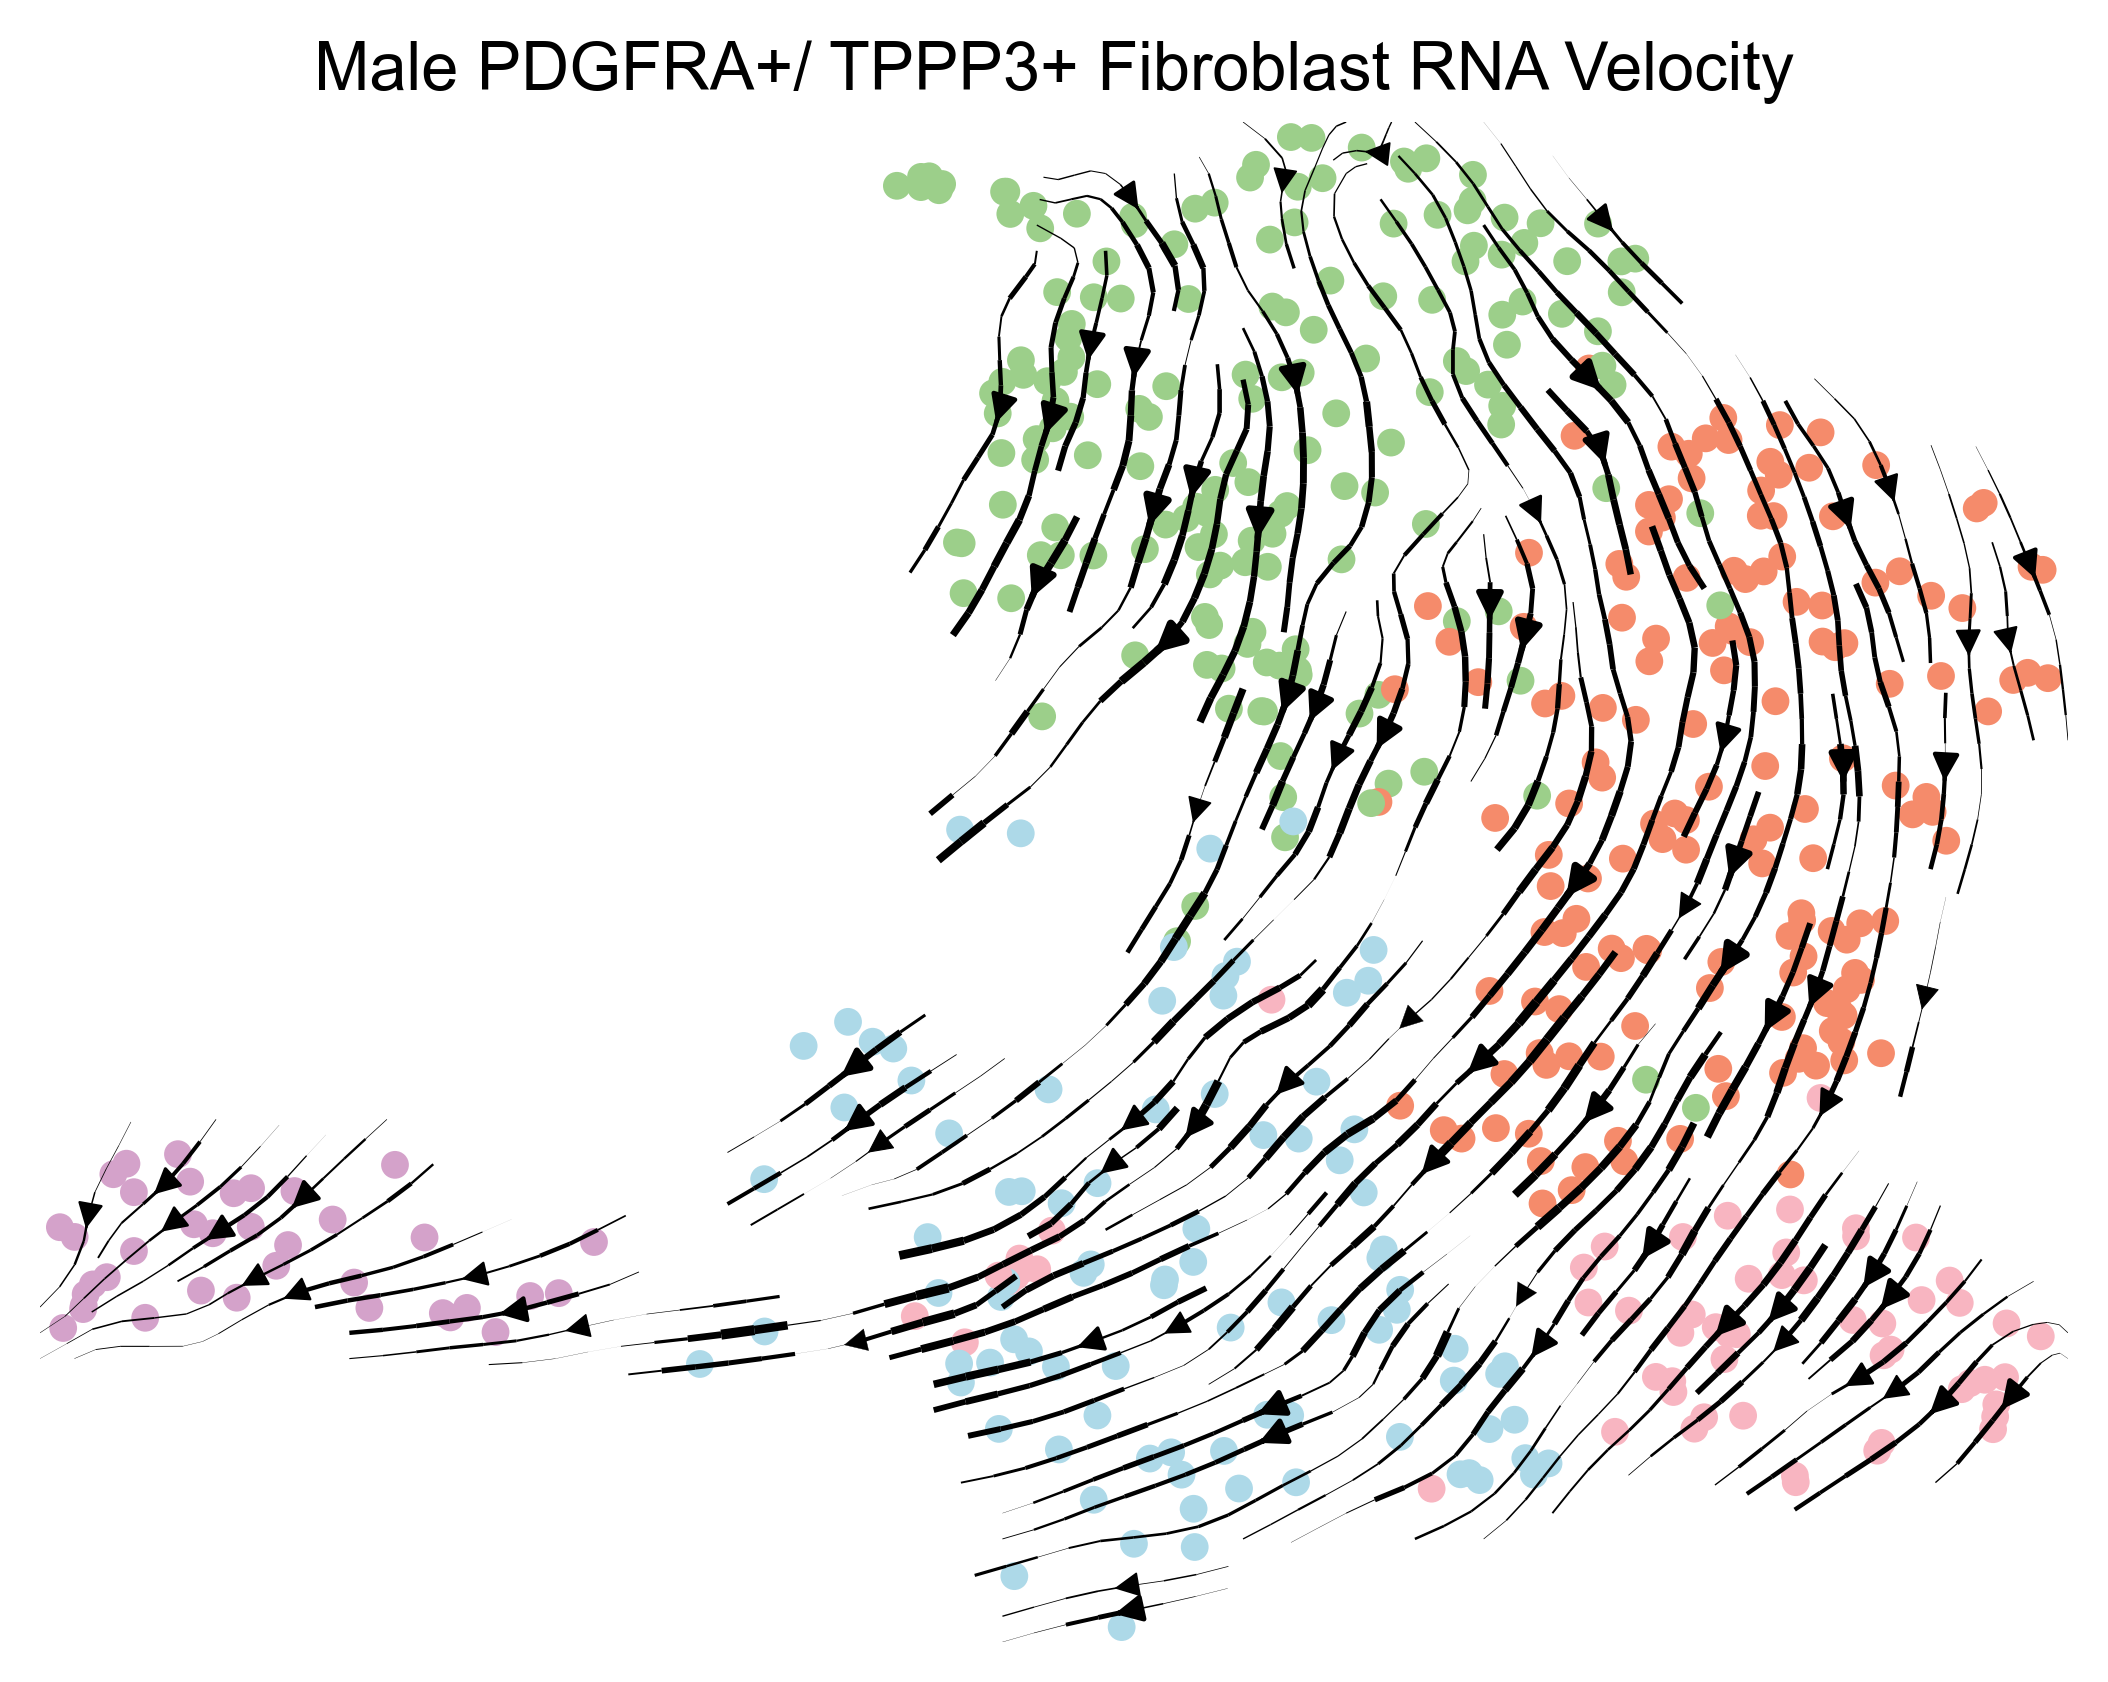

In [119]:
scv.pl.velocity_embedding_stream(mdata, 
                                 basis = 'umap', 
                                 color = "fib_cells", 
                                 density = 2,
                                 size = 100,
                                 alpha = 1,
                                 palette= ["#f58b6b","#add9e8","#9ccf8a","#f8b5c1","#d4a2ca"],
                                 title = 'Male PDGFRA+/ TPPP3+ Fibroblast RNA Velocity',
                                 legend_loc = 'none',
                                 dpi = 200,
                                 figsize = (6.5,5),
                                 save='male_fibro_velo.pdf'
                                 )




In [114]:
fdata = scv.read("fibro_female.h5ad")
ldata = scv.read("ACL_combined.loom")

fdata = scv.utils.merge(fdata, ldata)

scv.pp.filter_and_normalize(fdata,min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(fdata, n_pcs=30, n_neighbors=30)

## dynamic modeling
##scv.tl.recover_dynamics(fdata,var_names='all')
scv.tl.recover_dynamics(fdata)
scv.tl.velocity(fdata, mode='dynamical')
scv.tl.velocity_graph(fdata)

scv.set_figure_params(format='pdf')


Filtered out 794 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/10 cores)
    finished (0:02:07) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/10 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Library/F

figure cannot be saved as pdf, using png instead (can only output finite numbers in pdf).
saving figure to file ./figures/scvelo_female_fibro_velo.png


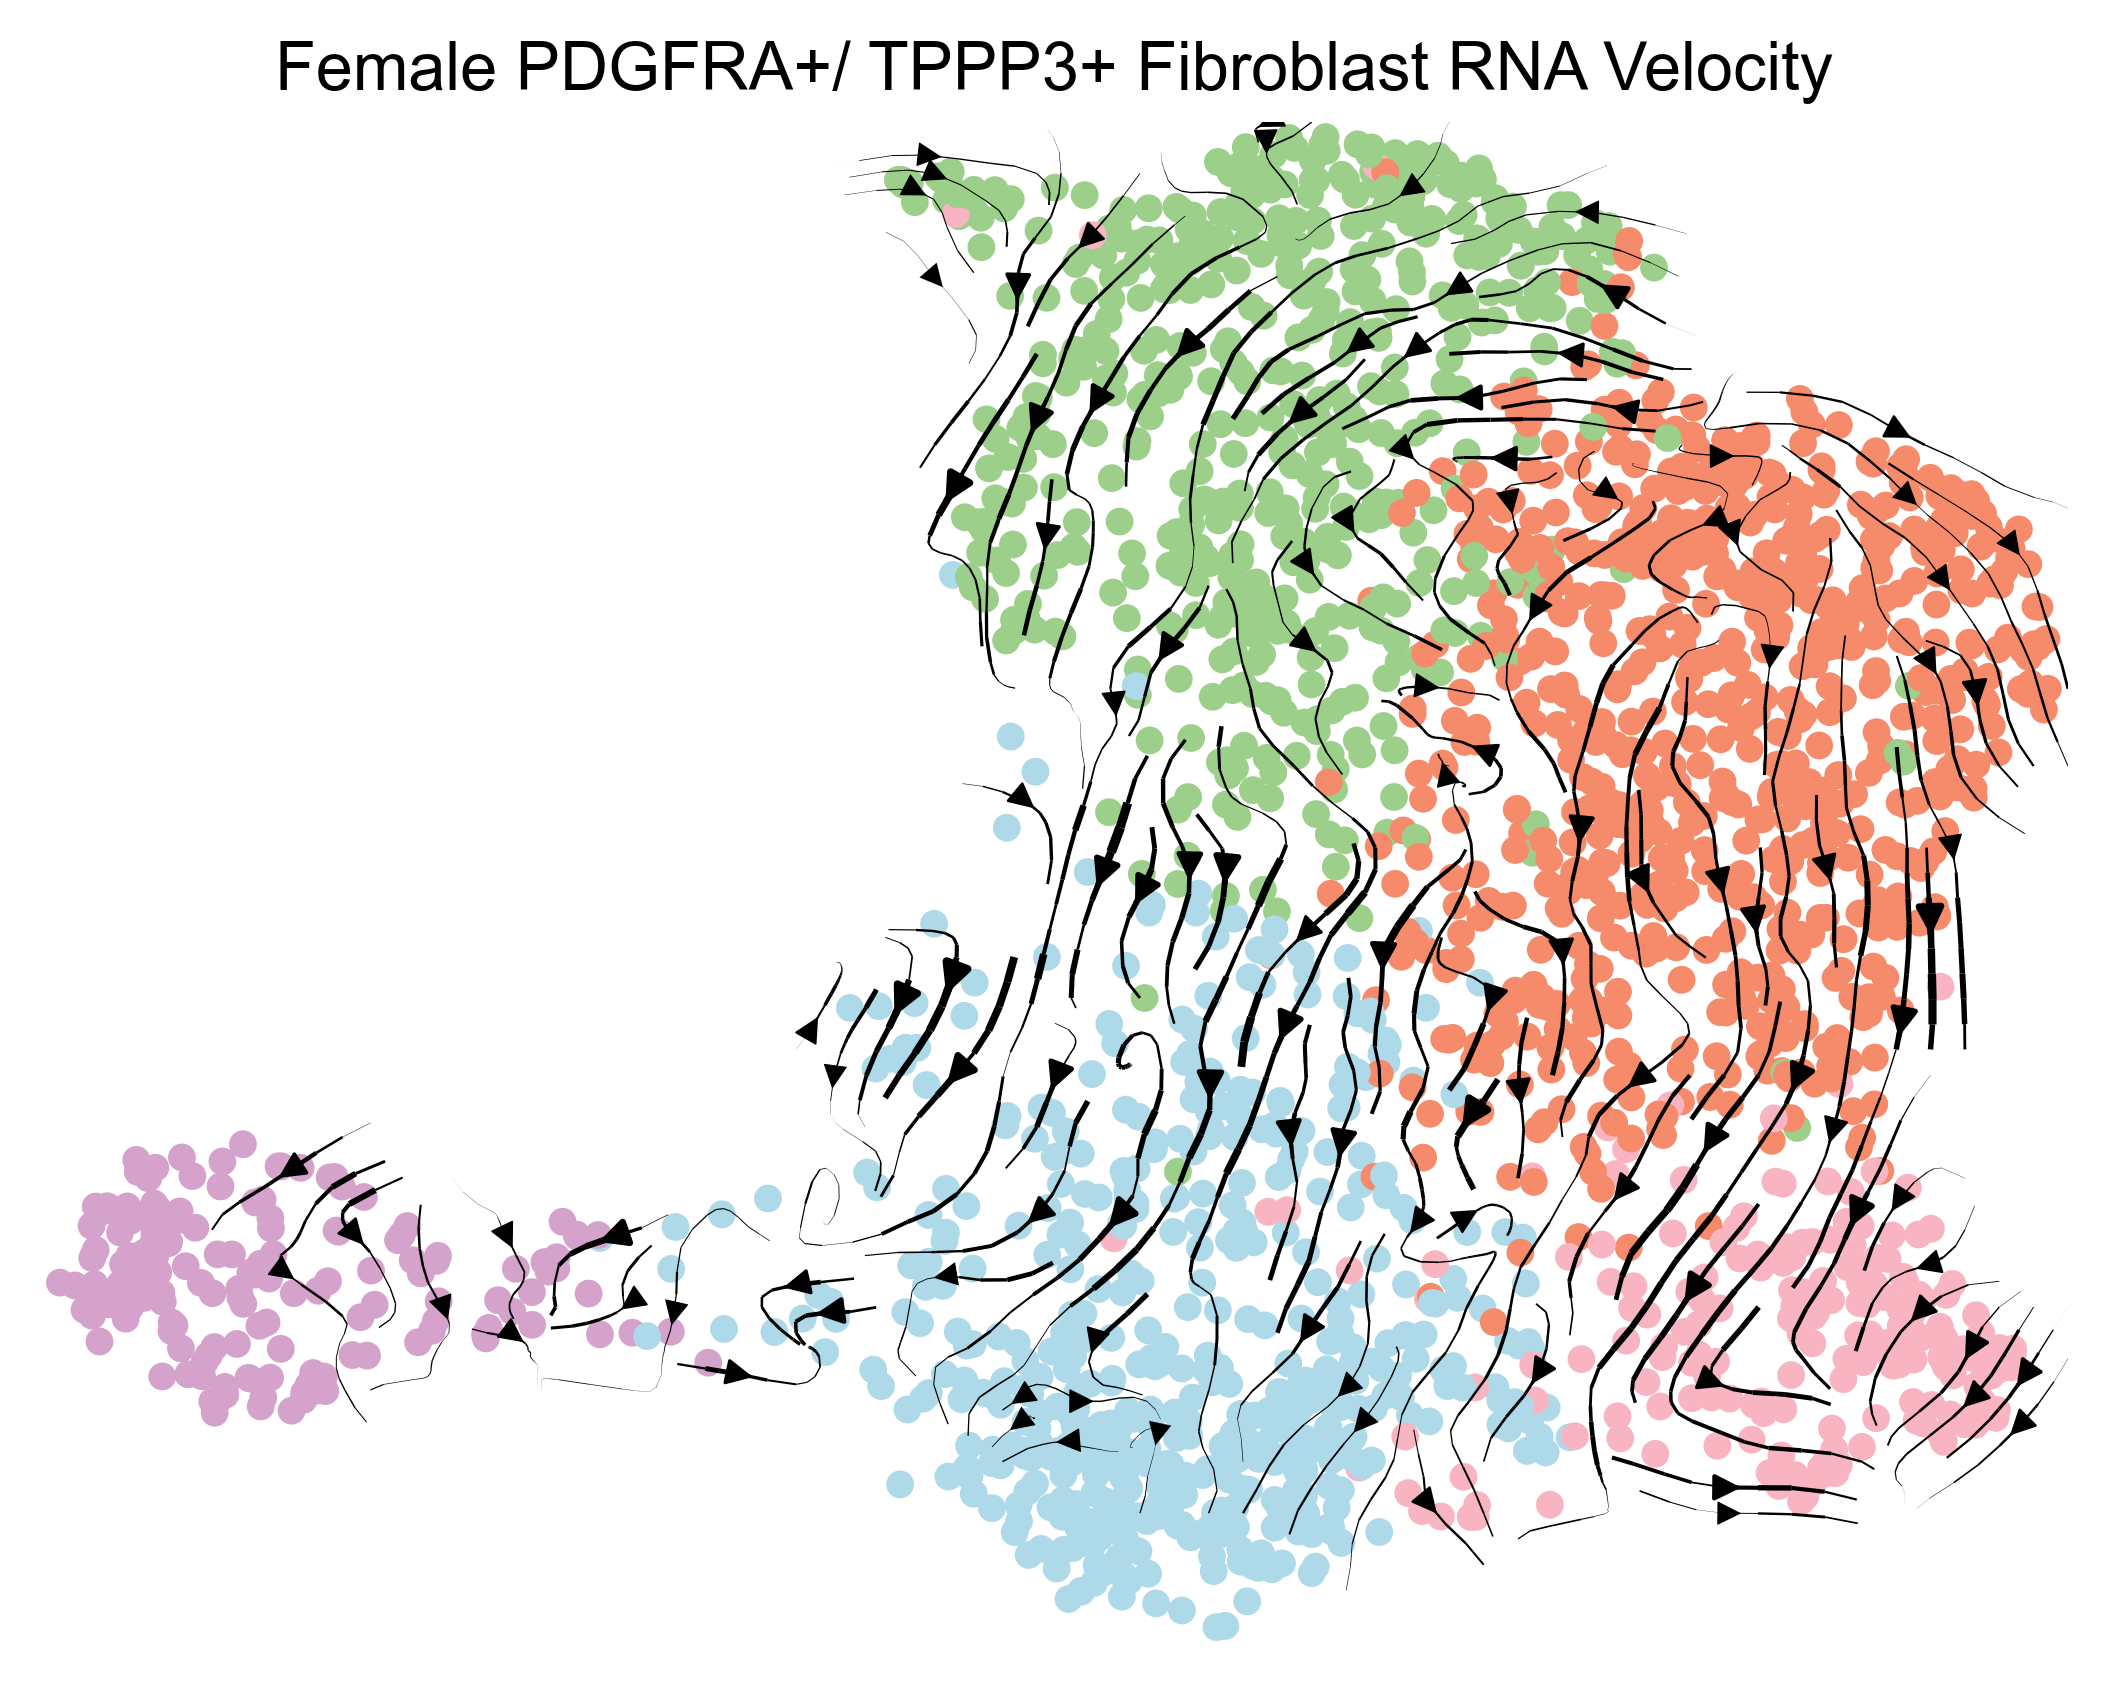

In [121]:
scv.pl.velocity_embedding_stream(fdata, basis = 'umap', 
                                 color = "fib_cells", 
                                 density = 2,
                                 size = 100,
                                 alpha = 1,
                                 palette= ["#f58b6b","#add9e8","#9ccf8a","#f8b5c1","#d4a2ca"],
                                 title = 'Female PDGFRA+/ TPPP3+ Fibroblast RNA Velocity',
                                 legend_loc = 'none',
                                 dpi = 200,
                                 figsize = (6.5,5),
                                 save='female_fibro_velo.pdf'
                                 )